### Read the csv file as a dataframe object and check the data

In [1]:
import pandas as pd
df = pd.read_csv('car data.csv')

In [2]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Deriving Age from the year and drop unnecessary column

In [5]:
import datetime
final_dataframe = df.copy()
current_year = datetime.datetime.now().year
final_dataframe['age'] = current_year - final_dataframe['year']
final_dataframe.drop(['year'], axis=1, inplace=True)
final_dataframe.drop(['name'], axis=1, inplace=True)
final_dataframe.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9


### Creating dummy variables for text values

In [6]:
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [7]:
final_dataframe = pd.get_dummies(final_dataframe, drop_first=True)
# it is just converting all these textual attributes into some binary values
# drop first is true because we want to avoid dummy variable trap
final_dataframe.head()

,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,16,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,16,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,11,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,6,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,9,1,0,0,0,1,0,1,0,1,0,0


### Checking the histogram, Scatter Plot & Correlations

array([[<AxesSubplot: title={'center': 'selling_price'}>,
        <AxesSubplot: title={'center': 'km_driven'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'fuel_Diesel'}>],
       [<AxesSubplot: title={'center': 'fuel_Electric'}>,
        <AxesSubplot: title={'center': 'fuel_LPG'}>,
        <AxesSubplot: title={'center': 'fuel_Petrol'}>,
        <AxesSubplot: title={'center': 'seller_type_Individual'}>],
       [<AxesSubplot: title={'center': 'seller_type_Trustmark Dealer'}>,
        <AxesSubplot: title={'center': 'transmission_Manual'}>,
        <AxesSubplot: title={'center': 'owner_Fourth & Above Owner'}>,
        <AxesSubplot: title={'center': 'owner_Second Owner'}>],
       [<AxesSubplot: title={'center': 'owner_Test Drive Car'}>,
        <AxesSubplot: title={'center': 'owner_Third Owner'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

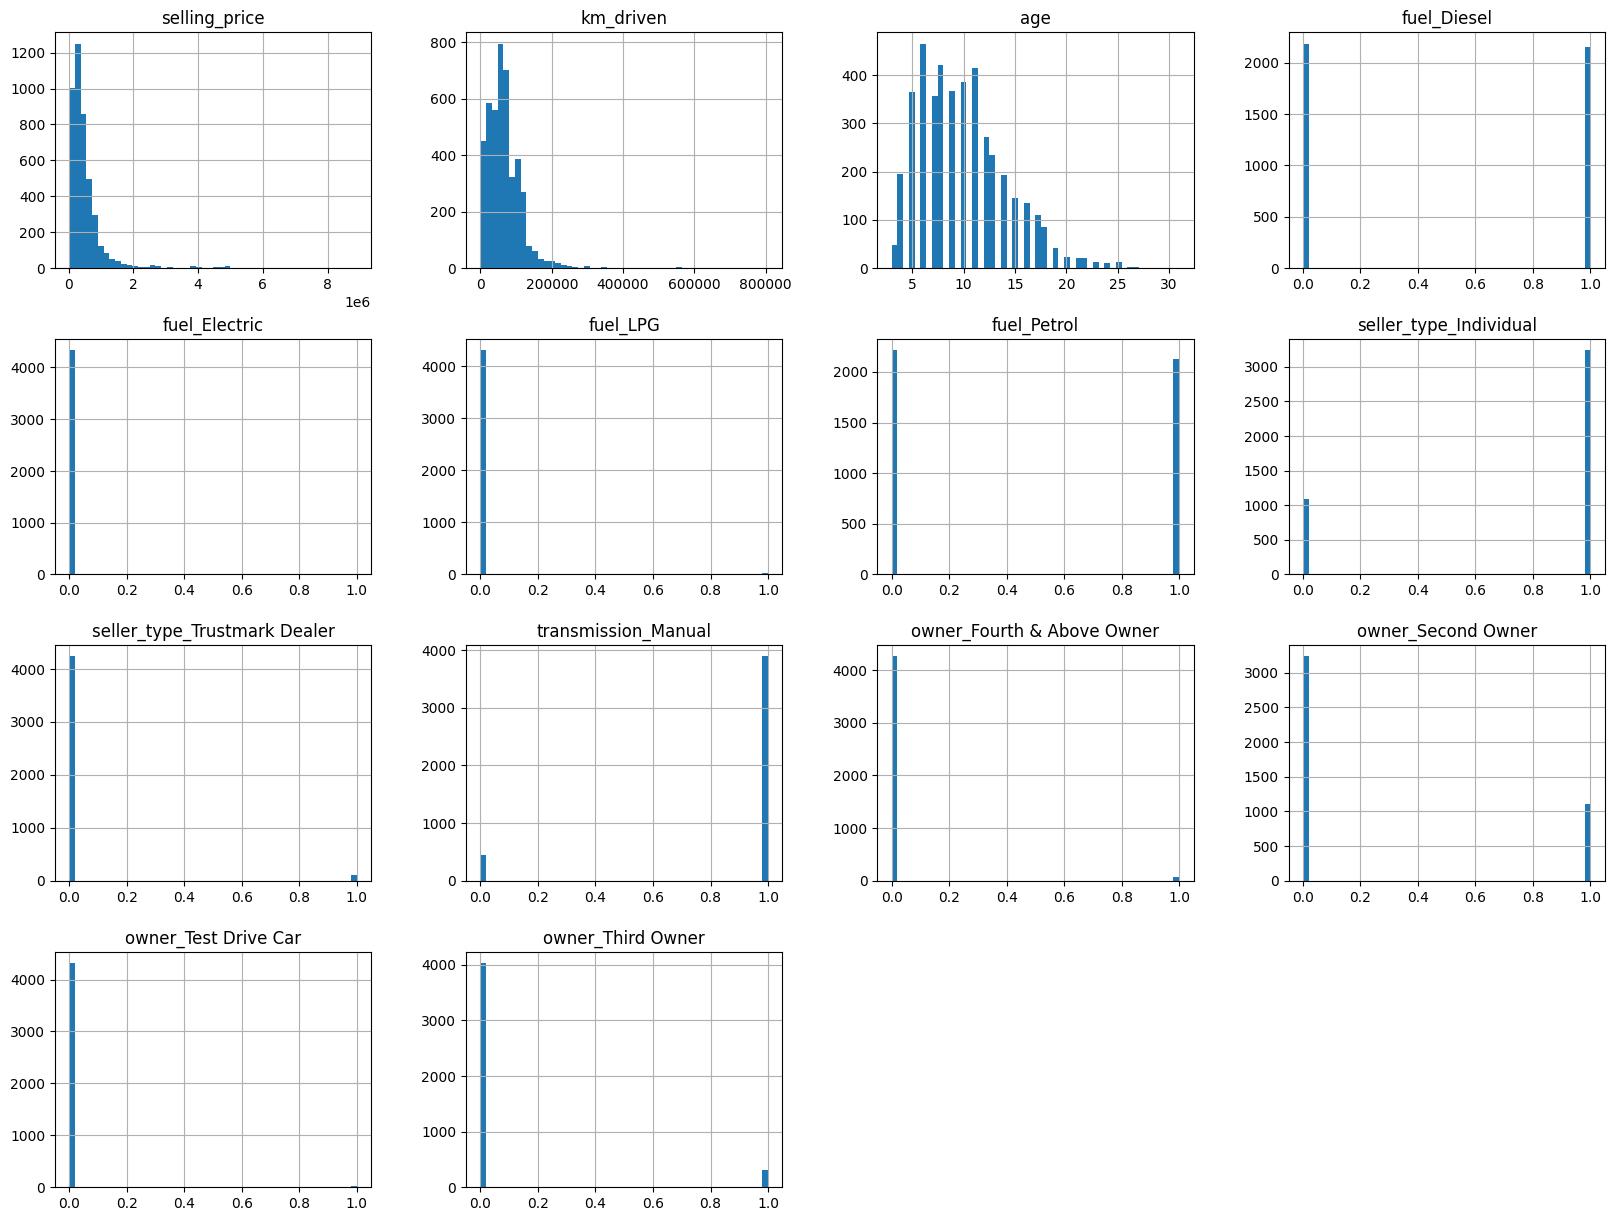

In [8]:
final_dataframe.hist(bins = 50, figsize = (20, 15))

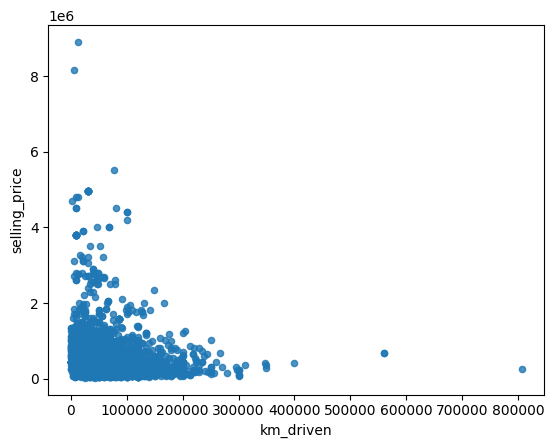

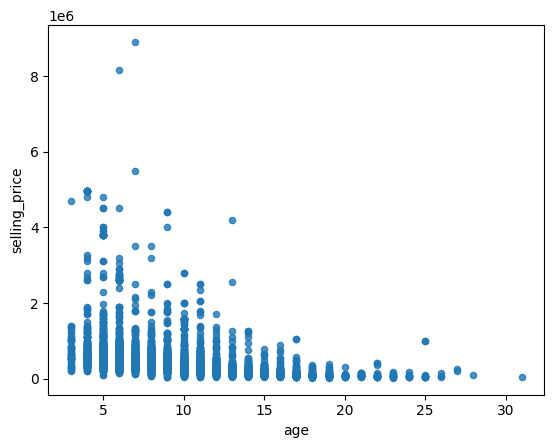

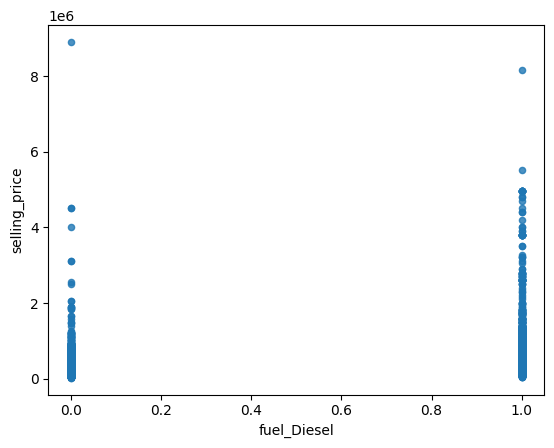

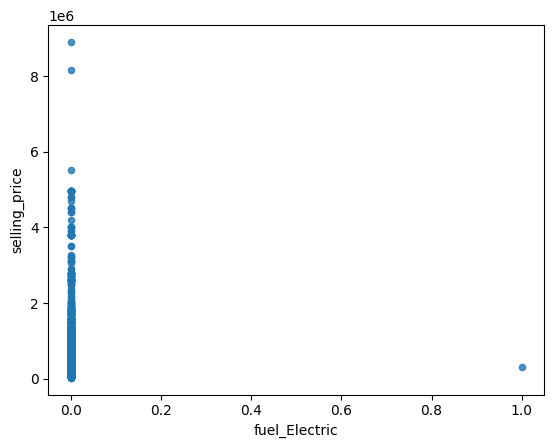

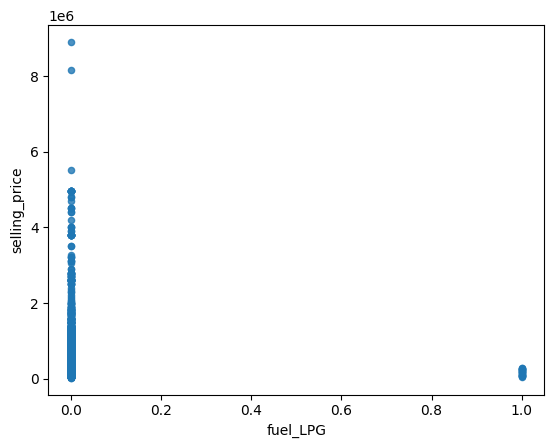

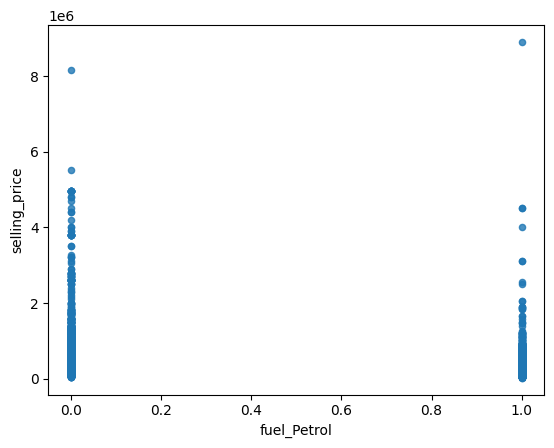

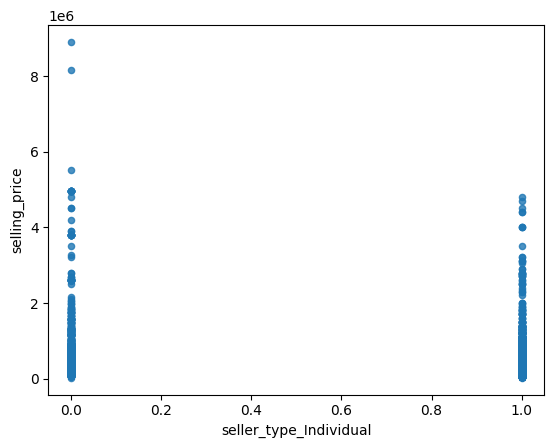

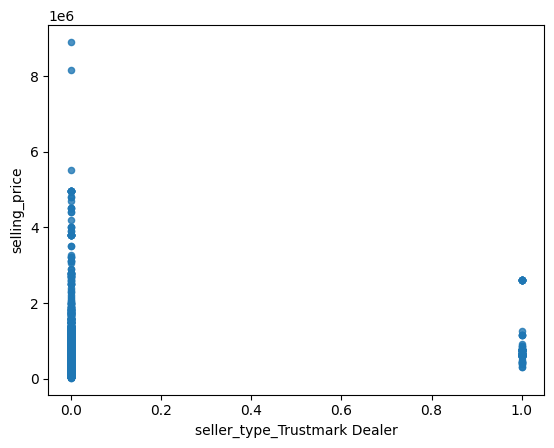

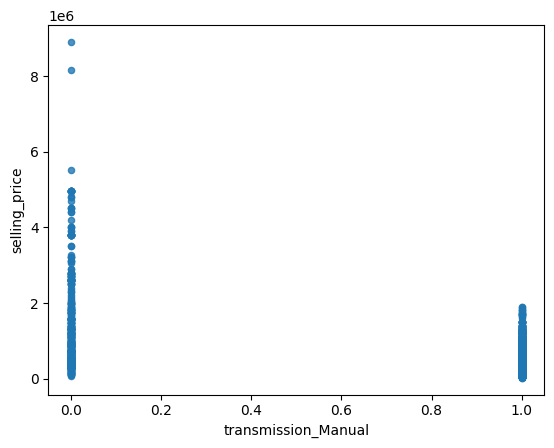

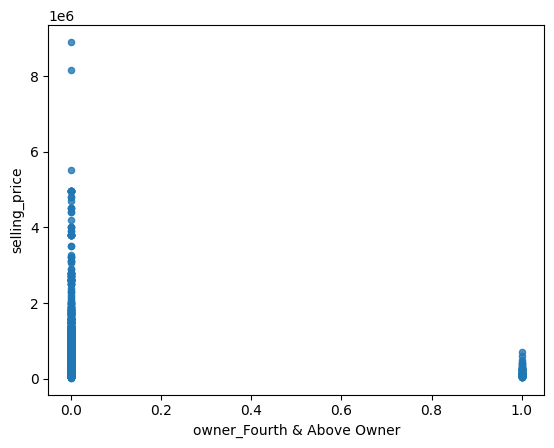

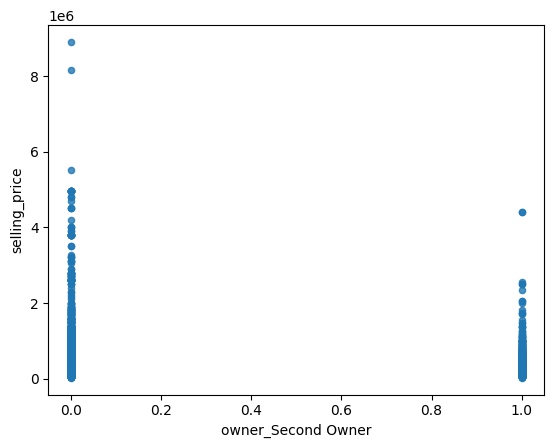

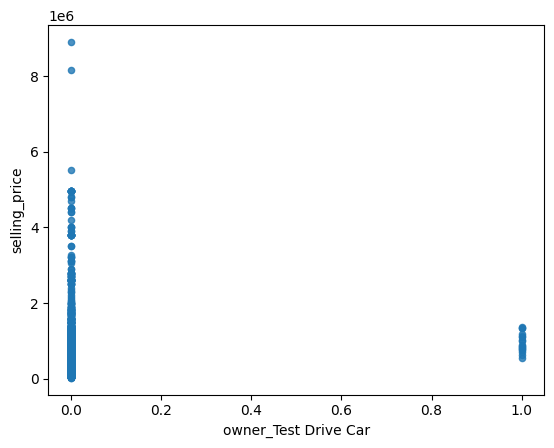

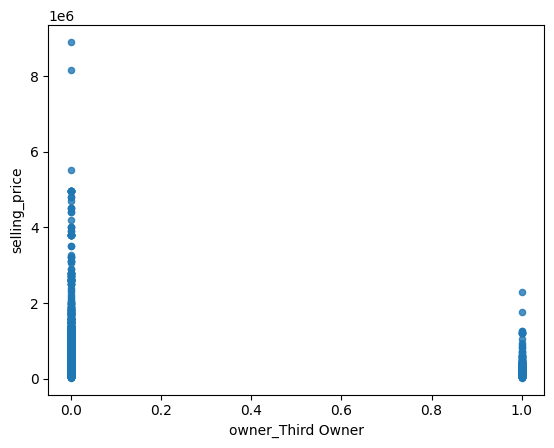

In [9]:
cols = final_dataframe.columns
cols
for i in cols:
    if i == "selling_price":
        continue
    final_dataframe.plot(kind = "scatter", x = i, y = "selling_price", alpha = 0.8)


In [10]:
corr_matrix = final_dataframe.corr()
# correlation shomanupatik naki bestanupatik oita dekhabe
corr_matrix['selling_price'].sort_values(ascending=False)
# eita MEDV er shapekkhe correlation dekhabe

selling_price                   1.000000
fuel_Diesel                     0.282947
seller_type_Trustmark Dealer    0.110176
owner_Test Drive Car            0.048799
fuel_Electric                  -0.005095
fuel_LPG                       -0.042434
owner_Fourth & Above Owner     -0.078725
owner_Third Owner              -0.111326
owner_Second Owner             -0.161986
km_driven                      -0.192289
seller_type_Individual         -0.236798
fuel_Petrol                    -0.269453
age                            -0.413922
transmission_Manual            -0.530205
Name: selling_price, dtype: float64

### Stratified Train Test Split

the dummy variables need to be split strategically

In [86]:
dummy_cols = final_dataframe.filter(regex='fuel_|seller_type_|transmission_|owner_').columns.tolist()
dummy_cols

['fuel_Diesel',
 'fuel_Electric',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Manual',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner']

In [97]:
from sklearn.model_selection import StratifiedShuffleSplit
ssp = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# fuel_Electric

dummy_columns = ['fuel_Diesel',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Trustmark Dealer',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner',
]

for train_index, test_index in ssp.split(final_dataframe, final_dataframe[dummy_columns]):
    strat_train_set = final_dataframe.loc[train_index]
    strat_test_set = final_dataframe.loc[test_index]

0    4339
1       1
Name: fuel_Electric, dtype: int64

In [98]:
strat_train_set['transmission_Manual'].value_counts()

1    3103
0     369
Name: transmission_Manual, dtype: int64

In [99]:
strat_test_set['transmission_Manual'].value_counts()

1    789
0     79
Name: transmission_Manual, dtype: int64